In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

import torch
import torch.nn as nn

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from itertools import product as it_prod

# plotting packages 
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install scikit-optimize
import warnings
warnings.filterwarnings('ignore')

import os
import sys

from lightgbm import LGBMRegressor

from skopt import BayesSearchCV

# Set the environment variable to suppress LightGBM warnings
os.environ['LGBM_CONFIG'] = '--log_level=3'

# Redirect warnings to a file
sys.stderr = open('warnings.txt', 'w')


# Opening file
file1 = open('C:\\Users\\matve\\Documents\\Python Scripts\\junior_quant_task\\train.txt', 'r')
count = 0
ob_num = 0
ob = [[0] * 3 for _ in range(40)]
ordbook = [[0] * 2 for _ in range(10000)]


for line in file1:
    if ("price" in line.strip()):
#         print(pd.DataFrame(data=ob))
        ob_num = 0
        ordbook[count][1] = tuple([x for x in line.strip().split(' price: ')])
        ordbook[count][0] = pd.DataFrame(data=ob)
        ordbook[count][0].columns = ['price','amount','side']
        count +=1
    elif not ("=" in line.strip()):
        line = line.strip().split('\t')
        ob[ob_num][0] = int(line[0])
        ob[ob_num][1] = int(line[1])
        ob[ob_num][2] = line[2]
        ob_num += 1
 
# Closing files
file1.close()

ordbook = [row for row in ordbook if row[1] != 0]

print(ordbook[0][1])  

('Sell', '130895')


# Likelihood search

In [8]:
np.zeros((9000, 9000))
deltas = np.zeros((9000, 9000))
import time

start = time.time()


for i in range(0,9000):
    for j in range(0,i):
        deltas[i, j] = abs(ordbook[i][0]['amount']-ordbook[j][0]['amount']).sum()

end = time.time()
print(end - start)
        
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.DataFrame(deltas)

8187.331166028976


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,8975,8976,8977,8978,8979,8980,8981,8982,8983,8984,8985,8986,8987,8988,8989,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,639.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,785.0,772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,771.0,558.0,696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,789.0,746.0,624.0,696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,809.0,708.0,856.0,690.0,772.0,769.0,678.0,701.0,724.0,717.0,865.0,639.0,858.0,748.0,729.0,743.0,719.0,830.0,865.0,825.0,1054.0,1176.0,1021.0,968.0,883.0,...,1014.0,1078.0,972.0,691.0,868.0,909.0,896.0,913.0,862.0,936.0,932.0,429.0,398.0,457.0,874.0,648.0,871.0,463.0,870.0,582.0,0.0,0.0,0.0,0.0,0.0
8996,915.0,756.0,728.0,854.0,760.0,773.0,752.0,767.0,698.0,791.0,787.0,931.0,854.0,762.0,687.0,771.0,887.0,866.0,665.0,711.0,916.0,1086.0,879.0,852.0,851.0,...,1040.0,1028.0,1124.0,759.0,948.0,1061.0,1034.0,1037.0,946.0,1080.0,1048.0,675.0,656.0,709.0,744.0,818.0,1101.0,899.0,834.0,718.0,850.0,0.0,0.0,0.0,0.0
8997,680.0,853.0,683.0,803.0,775.0,804.0,709.0,728.0,825.0,718.0,716.0,928.0,725.0,947.0,840.0,892.0,606.0,699.0,816.0,716.0,935.0,933.0,964.0,965.0,720.0,...,1037.0,1057.0,961.0,754.0,965.0,966.0,975.0,968.0,917.0,975.0,929.0,750.0,747.0,722.0,759.0,835.0,1064.0,816.0,1035.0,765.0,785.0,821.0,0.0,0.0,0.0
8998,708.0,803.0,599.0,787.0,669.0,758.0,655.0,674.0,771.0,690.0,692.0,878.0,745.0,897.0,820.0,830.0,540.0,641.0,724.0,636.0,847.0,929.0,914.0,905.0,658.0,...,999.0,1041.0,977.0,804.0,1003.0,950.0,953.0,962.0,913.0,983.0,923.0,748.0,749.0,740.0,705.0,789.0,1038.0,748.0,997.0,675.0,733.0,837.0,252.0,0.0,0.0


In [10]:
t=pd.DataFrame(deltas).stack()
t = t[t>0].sort_values()

In [17]:
t.xs(8333, level = 0)

3072     913.0
3094     950.0
3093     951.0
5697    1015.0
5696    1051.0
         ...  
356     4152.0
346     4155.0
361     4163.0
358     4166.0
351     4219.0
Length: 8333, dtype: float64

In [4]:
def preproc(df, order, price):
    df['quote'] = df['price']*df['amount']
    df['t'] = (-1)**(df['side']=='Buy')*df['price']
    df.set_index('side', inplace = True)

    df = df.groupby(level = 0).apply(lambda t: t.sort_values(by = 't')).droplevel(0)
    df['C'] = df['amount']+1j*df['quote']/1e+5
    
    D_cs = df.groupby(level = 0)['C'].apply(lambda t: t.cumsum()).droplevel(0)
    D_cs *= (-1)**(df['t']<0)
    D_cs = D_cs.sort_values().to_numpy()
    
    cvol, cquot = D_cs.real, D_cs.imag
    
#     print(df['D'].to_numpy())
    return cvol, cquot

def preproc(df, order, price):
    df['quote'] = df['price']*df['amount']
    df['t'] = (-1)**(df['side']=='Buy')*df['price']
    df.set_index('side', inplace = True)

    df = df.groupby(level = 0).apply(lambda t: t.sort_values(by = 't')).droplevel(0)
    df['C'] = df['amount']+1j*df['quote']/1e+5
    
    df['D'] = df.groupby(level = 0)['C'].apply(lambda t: t.cumsum()).droplevel(0)
    
#     print(df['D'].to_numpy())
    return np.concatenate([df[['C', 'D']].stack().apply(lambda x: [x.real, x.imag]).explode().to_numpy(),
                           [order, int(price)]])

In [5]:
anal = [preproc(ob.copy(), *com) for ob, com in ordbook]

NameError: name 'ordbook' is not defined

In [6]:
anal = pd.DataFrame(anal)
X_sell = anal[anal[160]=='Sell']
y_sell = X_sell[161]
X_sell = X_sell.drop([160, 161], axis = 1)

NameError: name 'pd' is not defined

In [7]:
X_sell = X_sell.astype(float).apply(np.log)
y_sell = y_sell.astype(float)

NameError: name 'X_sell' is not defined

In [194]:
X_sell

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159
0,1.386294,1.655405,1.386294,1.655405,2.197225,2.466297,2.564949,2.834034,3.951244,4.220278,4.174387,4.443432,1.791759,2.060756,4.262680,4.531720,2.079442,2.348399,4.369448,4.638480,3.332205,3.601124,4.672829,4.941831,3.091042,...,6.053264,2.564949,2.834709,5.823046,6.092497,2.564949,2.834747,5.860786,6.130250,2.890372,3.160208,5.910797,6.180279,3.091042,3.360917,5.968708,6.238212,2.772589,3.042501,6.008813,6.278334,3.713572,3.983523,6.104793,6.374353
1,2.079442,2.348590,2.079442,2.348590,2.079442,2.348552,2.772589,3.041719,2.564949,2.834022,3.367296,3.636400,2.890372,3.159406,3.850148,4.119225,1.386294,1.655290,3.931826,4.200897,2.302585,2.571543,4.110874,4.379926,3.178054,...,5.949686,2.397895,2.667693,5.717028,5.986552,3.258097,3.527933,5.799093,6.068641,2.302585,2.572460,5.828946,6.098504,1.386294,1.656207,5.840642,6.110204,3.091042,3.360993,5.902633,6.172219,3.526361,3.796349,5.991465,6.261085
2,1.609438,1.878854,1.609438,1.878854,1.945910,2.215288,2.484907,2.754301,0.000000,0.269340,2.564949,2.834339,2.079442,2.348743,3.044522,3.313879,3.555348,3.824612,4.025352,4.294650,2.302585,2.571810,4.189655,4.458942,1.098612,...,5.918854,2.995732,3.265798,5.717028,5.986920,3.761200,4.031304,5.849325,6.119243,2.708050,2.978192,5.891644,6.161572,3.737670,4.007849,6.001415,6.271369,2.397895,2.668113,6.028279,6.298239,2.397895,2.668151,6.054439,6.324408
4,1.609438,1.878969,1.609438,1.878969,1.098612,1.368029,2.079442,2.348929,1.609438,1.878816,2.564949,2.834395,2.197225,2.466564,3.091042,3.360445,3.912023,4.181325,4.276666,4.545999,3.555348,3.824612,4.672829,4.942139,2.197225,...,5.970335,3.761200,4.031304,5.834811,6.104729,2.708050,2.978192,5.877736,6.147663,3.761200,4.031380,5.991465,6.261419,2.397895,2.668113,6.018593,6.288555,2.397895,2.668151,6.045005,6.314975,1.098612,1.368907,6.052089,6.322061
6,1.386294,1.655863,1.386294,1.655863,1.098612,1.368143,1.945910,2.215463,2.302585,2.572078,2.833213,3.102731,2.197225,2.466679,3.258097,3.527592,2.639057,2.908474,3.688879,3.958347,1.945910,2.215288,3.850148,4.119602,1.791759,...,6.116425,3.761200,4.031380,5.963579,6.233587,2.397895,2.668113,5.991465,6.261478,2.484907,2.755163,6.021023,6.291044,1.386294,1.656589,6.030685,6.300708,1.609438,1.879770,6.042633,6.312660,2.944439,3.214810,6.086775,6.356816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,3.912023,4.186582,3.912023,4.186582,0.693147,0.967630,3.951244,4.225800,2.302585,2.577030,4.127134,4.401672,2.772589,3.046996,4.356709,4.631220,2.708050,2.982419,4.532599,4.807088,2.772589,3.046920,4.691348,4.965813,3.044522,...,6.135683,3.135494,3.410623,5.924256,6.199167,3.637586,3.912753,6.021023,6.295958,4.077537,4.352742,6.154858,6.429827,4.143135,4.418377,6.280396,6.555397,3.295837,3.571117,6.329721,6.604735,3.828641,4.103960,6.408529,6.683566
8992,4.007333,4.281816,4.007333,4.281816,1.098612,1.373057,4.060443,4.334924,2.564949,2.839356,4.262680,4.537147,1.791759,2.066128,4.343805,4.618265,2.079442,2.353772,4.442651,4.717099,1.791759,2.066052,4.510860,4.785297,0.693147,...,6.061788,3.828641,4.103732,5.918894,6.193809,3.135494,3.410623,5.978886,6.253814,3.258097,3.533263,6.042633,6.317575,3.496508,3.771712,6.118097,6.393059,4.143135,4.418377,6.248043,6.523039,3.258097,3.533377,6.297109,6.572119
8994,0.000000,0.274521,0.000000,0.274521,0.693147,0.967630,1.098612,1.373108,0.000000,0.274445,1.386294,1.660777,2.197225,2.471631,2.564949,2.839380,2.890372,3.164741,3.433987,3.708382,0.000000,0.274331,3.465736,3.740128,2.484907,...,6.155458,3.526361,3.801489,5.971262,6.246205,3.258097,3.533263,6.035481,6.310438,3.663562,3.938766,6.124683,6.399661,4.143135,4.418377,6.253829,6.528839,3.258097,3.533377,6.302619,6.577642,3

In [48]:

params = {'num_leaves' : [7, 15, 31], 'max_depth':[-1, 6], 
          'n_estimators':[50, 100, 200], 'learning_rate':[0.2, 0.1, 0.05]}
reg = LGBMRegressor(objective = 'regression', linear_tree = True)

gs = GridSearchCV(reg, params, scoring = 'r2', verbose = 10)
gs.fit(X_sell, y_sell)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START learning_rate=0.2, max_depth=-1, n_estimators=50, num_leaves=7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19568
[LightGBM] [Info] Number of data points in the train set: 3605, number of used features: 80
[LightGBM] [Info] Start training from score 131534.718447
[CV 1/5; 1/54] END learning_rate=0.2, max_depth=-1, n_estimators=50, num_leaves=7;, score=0.974 total time=   0.0s
[CV 2/5; 1/54] START learning_rate=0.2, max_depth=-1, n_estimators=50, num_leaves=7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19550
[LightGBM] [Info] Number of data points in the train set: 3605, number of used features: 80
[LightGBM] [Info] S

GridSearchCV(estimator=LGBMRegressor(linear_tree=True, objective='regression'),
             param_grid={'learning_rate': [0.2, 0.1, 0.05],
                         'max_depth': [-1, 6], 'n_estimators': [50, 100, 200],
                         'num_leaves': [7, 15, 31]},
             scoring='r2', verbose=10)

In [198]:
#s LGBM

In [195]:
params = dict()
params['learning_rate'] = (1e-4, 1e-0, 'log-uniform')
params['n_estimators'] = (50, 400)
params['num_leaves'] = (7, 127)
params['max_depth'] = (4, 10)

In [196]:
X_sell_train = X_sell.iloc[:4000]
y_sell_train = y_sell[:4000]

reg = LGBMRegressor(objective = 'regression', linear_tree = True, warning=False)
search = BayesSearchCV(estimator=reg, search_spaces=params, verbose = 10)
search.fit(X_sell_train, y_sell_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START learning_rate=0.019898123081339106, max_depth=6, n_estimators=363, num_leaves=23
[LightGBM] [Warning] Unknown parameter: warning
[LightGBM] [Warning] Unknown parameter: warning
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34425
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 160
[LightGBM] [Info] Start training from score 131466.576563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

BayesSearchCV(estimator=LGBMRegressor(linear_tree=True, objective='regression',
                                      warning=False),
              search_spaces={'learning_rate': (0.0001, 1.0, 'log-uniform'),
                             'max_depth': (4, 10), 'n_estimators': (50, 400),
                             'num_leaves': (7, 127)},
              verbose=10)

In [199]:
y_LGBM_pred_round = np.around(search.best_estimator_.predict(X_sell[4000:])/5)*5
y_LGBM_test = y_sell[4000:]

print(search.best_score_)
print(search.best_params_)
print("LGBM precision - ", np.sum(y_LGBM_pred_round == y_LGBM_test) / 507)

[LightGBM] [Warning] Unknown parameter: warning
0.8967045289007863
OrderedDict([('learning_rate', 0.02269938999244757), ('max_depth', 7), ('n_estimators', 400), ('num_leaves', 22)])
LGBM precision -  0.14201183431952663


In [189]:
y_sell

Index([   0,    1,    2,    4,    6,    8,    9,   11,   13,   15,
       ...
       7973, 7975, 7977, 7979, 7981, 7983, 7985, 7987, 7989, 7991],
      dtype='int64', length=4000)

In [164]:
pd.DataFrame(zip(['{}_{}_{}_{}'.format(*t) for t in it_prod(['lvl', 'cum'], ['buy', 'sell'], range(20), ['vol', 'quote'])], search.best_estimator_.booster_.feature_importance('gain'))).sort_values(1, ascending = False);

In [165]:
(search.best_estimator_.predict(X_sell)-y_sell).quantile(np.linspace(0, 1, 21));

[LightGBM] [Warning] Unknown parameter: warning


In [169]:
reg = LinearRegression()

reg.fit(X_sell.iloc[:4000], y_sell[:4000])

LinearRegression()

LInar Regression precision -  0.1301775147928994


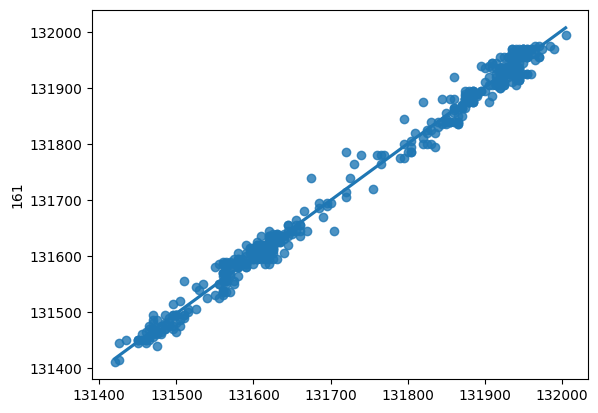

In [175]:
y_lr_pred_round = np.around(reg.predict(X_sell.iloc[4000:])/5)*5
y_lr_test = y_sell[4000:]

sns.regplot(x = y_lr_pred_round, y = y_lr_test)
print("Linar Regression precision - ", np.sum(y_lr_pred_round == y_lr_test) / 507)

In [ ]:
X_train = X[:8000]
y_train = y[:8000]

In [ ]:
model = nn.Sequential(
    nn.Linear(81, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
X_tensor = torch.tensor(X_train.to_numpy(), dtype = torch.float)
y_tensor = torch.tensor(y_train.reshape(-1, 1), dtype = torch.float)

In [ ]:
loss_list = []
best_loss = 9000

for n in range(1000):
    y_pred = model(X_tensor)
    print(y_pred.detach().view(-1).numpy()[:5])
    loss = loss_fn(y_pred, y_tensor) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if loss.detach().numpy() < best_loss:
        best_params = [x.detach().numpy() for x in model.parameters()]
        best_loss = loss.detach().numpy()

    
    loss_list.append(loss.detach().numpy())

In [ ]:
plt.plot(np.array(loss_list).reshape(-1))
plt.yscale('log')
plt.show()

In [ ]:
print(np.array(loss_list).reshape(-1)[-1]/9000)
print(np.min(loss_list)/9000)
print(best_loss/9000)